In [69]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import IFrame
import random
import sympy
from collections import Counter

# Entropy and natural language processing

Entropy is a measure of unpredictability; the more unpredictable a system is, the higher its entropy. Though originally formulated in the context of thermodynamics, Claude Shannon extended the concept to information in his landmark work [A Mathematical Theory of Communication](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf). Because it offers a measure of unpredictability, entropy is of crucual important in NLP, machine learning, and AI. 

This is the formula for entropy, where $H$ is the entropy measure and $X$ is a discrete probability distrbution:

$$H(X) = -\sum_{x \in X} p(x)\log_{2} p(x)$$

But what does this formula mean? Let's investigate.

The first step in understanding entropy comes with defining the notion of *surprise* (sometimes called *surprisal*, *information*, or *self-information*). When is an event surprising? When it's unlikely but happens anyway. Therefore, surprise is inveresely proportional to probability: high probability events have low surprise (we expect them to occur) while low probability events have high surprise (we *don't* expect them to occur). 

How might we represent this mathematically? First, note that every probability must take a value between $0$ and $1$, where the sum of all values in a distribution equals 1. This means that we want a formmula for surprise that turns small probability values into large surprise values, and vice versa. Usefully, the $-log(x)$ function does this between the values of $0$ and $1$:

/var/folders/zp/g2cg0s7d3vn0y092tw5x90rc0000gn/T/ipykernel_13674/1008982893.py:2: RuntimeWarning: divide by zero encountered in log2
  y = [-np.log2(i) for i in x] # Gets the log base 2 of these numbers


Text(0.5, 1.0, 'Surprise over probability')

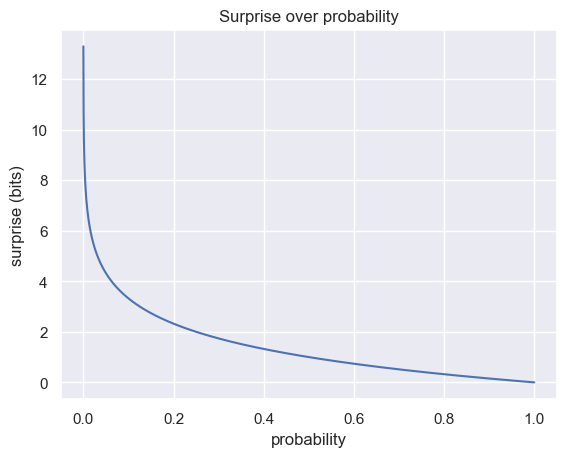

In [70]:

x = np.arange(0,1, 0.0001) # Gets the numbers between 0 and 1 in increments of 0.0001 using the numpy (np) library 
y = [-np.log2(i) for i in x] # Gets the log base 2 of these numbers

sns.lineplot(x = x, y = y) # Plots y against x
plt.ylabel('surprise (bits)')
plt.xlabel('probability')
plt.title('Surprise over probability')

As can be seen, as probability increases surprise decreases––which is exactly what we want for our measure of surprise. How can we use this to characterise the unpredictability (i.e. the entropy) of an entire system? This is done by multiplying the probability of every state of a system by its surprise, and adding the results together:

$$X = (x_1, x_2, ... , x_n)$$

$$H(X) = p(x_1)\times -\log_{2}p(x_1) + p(x_2)\times -\log_{2}p(x_2) + ...+ p(x_n)\times -\log_{2}p(x_n)$$

Notice that when we represent this using the summation operator ... we get the formula for entropy! 

$$H(X) = -\sum_{x \in X} p(x)\log_{2} p(x)$$

So entropy, in this sense, can be defined as the expected value of surprise across all states or outcomes of a system. That is, it's the 'average' amount of surprise across the system. 

## Example 1

What does this look like in practice? Let's take an example. An urn contains 7 red balls and 3 blue balls. What is the entropy of this system? The answer comes with recognising that it defines a probability distribution across colours:

Probability of a red ball: $\frac{7}{10}$

Probability of a blue ball: $\frac{3}{10}$

$$H(X) = -\begin{bmatrix}{\frac{7}{10}\times \log_{2}(\frac{7}{10}) + \frac{3}{10}\times \log_{2}(\frac{3}{10})}\end{bmatrix}$$

$$H(X) = -[-0.5210896782498619 - 0.3602012209808308]$$

$$H(X) = 0.8812908992306927 bits$$

Compare with an urn that contains 5 red balls and 5 blue balls:

$$H(X) = -\begin{bmatrix}{\frac{5}{10}\times \log_{2}(\frac{5}{10}) + \frac{5}{10}\times \log_{2}(\frac{5}{10})}\end{bmatrix}$$

$$H(X) = -[-0.5 - 0.5]$$

$$H(X) = 1 bits$$

Because the urn with equal numbers of red and blue balls is harder to predict, it has higher entropy than the system with more red than blue balls. 

Usefully, the `scipy` library has a function for calculating the entropy of a distribution, namely `sp.stats.entropy`:

In [71]:
dist_1 = [7/10, 3/10] 
dist_2 = [5/10, 5/10]

ent_1 = sp.stats.entropy(dist_1, base = 2) # Gets the entropy using log base 2 
ent_2 = sp.stats.entropy(dist_2, base = 2)

print("The entropy of dist_1 is {} bits.".format(ent_1),"The entropy of dist_2 is {} bits.".format(ent_2))

The entropy of dist_1 is 0.8812908992306927 bits. The entropy of dist_2 is 1.0 bits.


## Example 2

Another example: the frequencies of the letters of the alphabet.

In [74]:
letter_frequencies =  {'E': 0.12003601080324099, 'T': 0.09102730819245775, 'A': 0.08122436731019306, \
                       'O': 0.07682304691407423, 'I': 0.0731219365809743, 'N': 0.06952085625687708, \
                           'S': 0.06281884565369612, 'R': 0.06021806541962589, 'H': 0.05921776532959889, '\
                               D': 0.04321296388916676, 'L': 0.03981194358307493, 'U': 0.028808642592777836, \
                                   'C': 0.027108132439731925, 'M': 0.026107832349704915, 'F': 0.02300690207062119, \
                                       'Y': 0.021106331899569872, 'W': 0.02090627188156447, 'G': 0.020306091827548264, \
                                           'P': 0.01820546163849155, 'B': 0.014904471341402423, 'V': 0.011103330999299792,\
                                               'K': 0.006902070621186356, 'X': 0.0017005101530459142, 'Q': 0.0011003300990297092, \
                                                   'J': 0.0010003000900270084, 'Z': 0.0007002100630189059}

<AxesSubplot: >

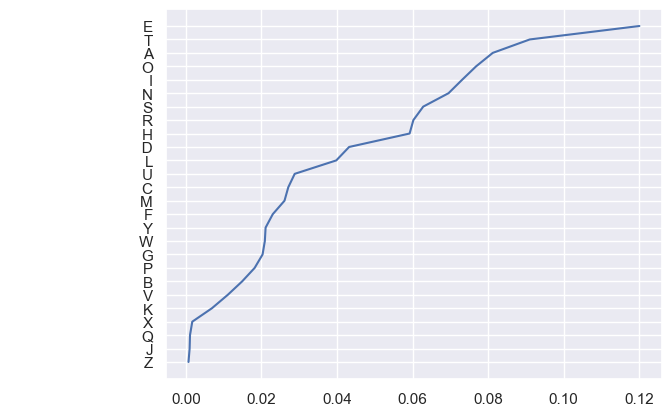

In [77]:
sns.lineplot(y = [i for i in letter_frequencies.keys()], x = [i for i in letter_frequencies.values()])

In [79]:
entropy_alphabet = sp.stats.entropy([i for i in letter_frequencies.values()], base = 2)
                                     
random_freq = [1] * 26
random_freq = [1/26 for i in random_freq]
                                     
entropy_rand = sp.stats.entropy(random_freq, base = 2)
                                     
print("The entropy of the English alphabet is {} bits.".format(entropy_alphabet),"The entropy of a system of 26 equiprobable symbols is {} bits.".format(entropy_rand))

The entropy of the English alphabet is 4.181610514870445 bits. The entropy of a system of 26 equiprobable symbols is 4.7004397181410935 bits.


# The Wow! signal––first message from an extraterrestrial civilisation?

But what good is entropy in the context of NLP? Entropy is valuable because it allows us to calculate when strings are likely to be meaningful, even if we don't know that that meaning is. What does this look like? Let's consider ... the Wow! signal.



In [39]:
IFrame('https://www.youtube.com/embed?v=TjQUucV83w4&ab_channel=WatchNow-Sci-Fi%26Fantasy', width=700, height=350)

Let's imagine that the Wow! signal contained the following binary string (it didn't):

In [43]:
text = '011101000110100001100101011100100110010101110011001000000110000100100000011100110111010001100001011100100010000001101101011000010110111000100000011101110110000101101001011101000110100101101110011001110010000001110100011010000110010100100000011100110110101101111001'


Now, let's generate a random string of the same length for comparison purposes:

In [44]:
rand = random.choices([0,1], k=len(text)) # Generates a random selection of 0's and 1's up to length of the message text
rand = [str(i) for i in rand] # Turns the selection into string data
rand = "".join(rand)

In [46]:
text_d = [text.count('0')/len(text), text.count('1')/len(text)] # Gets the probability of selecting a 0 or a 1 in the distribution
rand_d = [rand.count('0')/len(text), rand.count('1')/len(text)]

In [53]:
ent_t = sp.stats.entropy(text_d, base = 2)
ent_r = sp.stats.entropy(rand_d, base = 2)

This doesn't tell us much, so let's make some plausible assumptions:

* The aliens have a finite number of symobols that are analogous to the letters of the alphabet (i.e. they won't encode words directly)
* Each symbol will be encoded by groups of 0's and 1's
* The message will try to balance ease of decoding against expressive power
* The message is complete

Let's imagine that ever letter is ecoding by two binary digits. This gives us four possible symbols:

$$(0,0) = S_1$$
$$(0,1) = S_2$$
$$(1,0) = S_3$$
$$(1,1) = S_4$$

Are four symbols enough for an expressive alphabet? Not really. If we encode using three binary digits, we get eight ($2^3$) symbols, which is still too small. But if we use (say) ten digits, we get 1,024 ($2^{10}$) symbols which is likely too big. What's the most likely choice for the aliens to make? One clue comes from the length of the message. If it's complete, then the length of the encoding *must* evenly divide the message length. This gives the following options for the length of the encoding

In [56]:
symbol_length_t = sympy.divisors(len(text)) # Gets the numbers that evenly divide the message length using the `sympy` library for algebra

Now that we have all the possible encoding lengths, we can divide up the message into chunks matching each possible 'alphabet'. *One* of these will be the correct one––but we don't know which!

In [61]:
alphabets_t = []

for j in symbol_length_t:
    alphabets_t.append([text[i:i+j] for i in range(0, len(text), j)]) # Chunks the message into groups of 0's and 1's corresponding to all possible encoding lengths
    

# Get a count of how often each possible symbol occurs in the message for each alphabet and convert to pandas series
alphabets_t = [pd.Series(Counter(i)) for i in alphabets_t]

However, we need to compare our possible message to our random string so we can see where differences emerge. So, we do the same chunking for our random string:

In [62]:
symbol_length_r = sympy.divisors(len(rand))

alphabets_r = []

for j in symbol_length_r:
    alphabets_r.append([rand[i:i+j] for i in range(0, len(rand), j)])
    
alphabets_r = [pd.Series(Counter(i)) for i in alphabets_r]

Now, let's calculate the entropy of each possible alphabet for the message string and the random string:

In [63]:
entropies_t = [sp.stats.entropy(i, base = 2) for i in alphabets_t] # entropies of all message alphabets
entropies_r = [sp.stats.entropy(i, base = 2) for i in alphabets_r] # entropies of all random string alphabets

The next step comes with plotting all possible encoding lengths for the both the message and the random string and comparing one against the other.

<AxesSubplot: xlabel='encoding_length', ylabel='entropy'>

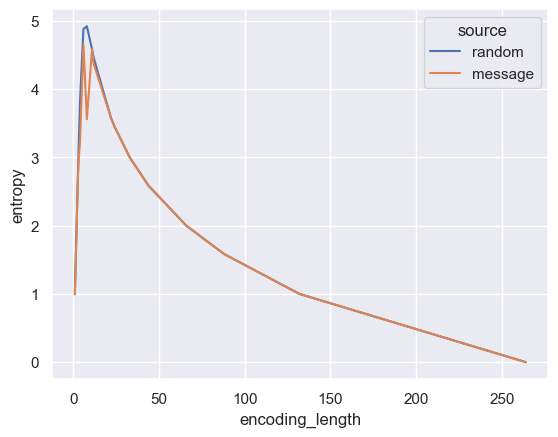

In [64]:
# Create a panddas dataframe from the entropy data to compare the message and the random texts

entropy = pd.DataFrame()
entropy['random'] = entropies_r
entropy['message'] = entropies_t

entropy = pd.melt(entropy)

entropy.columns = ['source', 'entropy']

entropy['encoding_length'] = symbol_length_r + symbol_length_t

# Plot the entropy for both message texts
sns.lineplot(x = 'encoding_length', y = 'entropy', hue = 'source', data = entropy)


In [65]:
entropy

,source,entropy,encoding_length
0,random,0.999627,1
1,random,1.998343,2
2,random,2.945764,3
3,random,3.821863,4
4,random,4.879664,6
5,random,4.923182,8
6,random,4.584963,11
7,random,4.459432,12
8,random,3.584963,22
9,random,3.459432,24


The last step comes with identifying the one character we can be reasonably sure is the most common item in the message. What is it?

In [68]:
most_frequent = alphabets_t[5].idxmax()
parsed_message = text.replace(most_frequent, " ")

In [67]:
parsed_message

'011101000110100001100101011100100110010101110011 01100001 01110011011101000110000101110010 011011010110000101101110 01110111011000010110100101110100011010010110111001100111 011101000110100001100101 011100110110101101111001'